In [1]:
import os
import statistics
import scipy as sp
import math
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
%matplotlib inline

In [ ]:
# Read data from CSV files
data_2019_2020 = pd.read_csv('/content/transfermarkt_fbref_201920.csv', sep=';', engine='python')
data_2017_2018 = pd.read_csv('/content/transfermarkt_fbref_201718.csv', sep=';', engine='python')
data_2018_2019 = pd.read_csv('/content/transfermarkt_fbref_201819.csv', sep=';', engine='python')


# Concatenate the dataframes
merged_data = pd.concat([data_2019_2020, data_2018_2019, data_2017_2018], ignore_index=True)

# Sort the dataframe by 'player' column
merged_data.sort_values('player', inplace=True)

In [3]:
merged_data.dropna(subset=['player'], inplace=True)

In [4]:
player_corrected = [i for i in merged_data['player']]

In [5]:
for indice_j,nom_j in enumerate(player_corrected) :
    tab_c = list(nom_j)
    l = len(tab_c)
    for indice_c,caractere in enumerate(tab_c) :
        if caractere == 'Ă' :
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '\x81' :
                    tab_c[indice_c] = 'A'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '\xad' :
                    tab_c[indice_c] = 'i'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '\x98' :
                    tab_c[indice_c] = 'O'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '©' :
                    tab_c[indice_c] = 'e'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'ˇ' :
                    tab_c[indice_c + 1] = 'a'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '‰' :
                    tab_c[indice_c] = 'E'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'ł' :
                    tab_c[indice_c] = 'o'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '«' :
                    tab_c[indice_c] = 'e'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'Ż' :
                    tab_c[indice_c] = 'i'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '‡' :
                    tab_c[indice_c] = 'c'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '–' :
                    tab_c[indice_c] = 'O'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '“' :
                    tab_c[indice_c] = 'O'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '±' :
                    tab_c[indice_c] = 'n'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '' :
                    tab_c[indice_c] = 'A'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'Ľ' :
                    tab_c[indice_c] = 'u'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '¶' :
                    tab_c[indice_c] = 'o'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '¸' :
                    tab_c[indice_c] = 'o'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'Ş' :
                    tab_c[indice_c] = 'e'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '§' :
                    tab_c[indice_c] = 'c'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'ş' :
                    tab_c[indice_c] = 'u'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '¤' :
                    tab_c[indice_c] = 'a'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '°' :
                    tab_c[indice_c] = 'o'
                    del tab_c[indice_c + 1]
                    break
                else :
                    tab_c[indice_c] = 'a'
                    break
        if caractere == 'Ł':
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'o' :
                    tab_c[indice_c] = 'o'
                    del tab_c[indice_c + 1]
                    break
        if caractere == 'Ĺ' :
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'ź' :
                    tab_c[indice_c] = 's'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '\x81' :
                    tab_c[indice_c] = 'L'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '\xa0' :
                    tab_c[indice_c] = 'S'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'ˇ' :
                    tab_c[indice_c] = 's'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'ľ' :
                    tab_c[indice_c] = 'z'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '»' :
                    tab_c[indice_c] = 'Z'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '„' :
                    tab_c[indice_c] = 'n'
                    del tab_c[indice_c + 1]
                    break
        if caractere == 'Ä' :
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '›' :
                    tab_c[indice_c] = 'e'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == 'Ť' :
                    tab_c[indice_c] = 'c'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '…' :
                    tab_c[indice_c] = 'a'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '™' :
                    tab_c[indice_c] = 'e'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '‡' :
                    tab_c[indice_c] = 'c'
                    del tab_c[indice_c + 1]
                    break
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '\x83' :
                    tab_c[indice_c] = 'a'
                    del tab_c[indice_c + 1]
                    break
        if caractere == 'Č' :
                if (indice_c + 1) < l and tab_c[indice_c + 1] == '›' :
                    tab_c[indice_c] = 't'
                    del tab_c[indice_c + 1]
                    break
    player_corrected[indice_j] = "".join(tab_c)

In [6]:
merged_data = merged_data.drop(['player'], axis=1)
merged_data.insert(0, 'player', player_corrected)


In [7]:
merged_data.drop(columns=['Column1','Unnamed: 0', 'Attendance','birth_year', 'MP'], inplace=True)

merged_data.head()

,player,nationality,position,squad,age,value,height,position2,foot,league,...,Pts,Pts/G,xG,xGA,xGDiff,xGDiff/90,CL,WinCL,CLBestScorer,Season
466,Aaron Connolly,ie IRL,FW,Brighton,19.0,4000000.0,175.0,Forward - Centre-Forward,right,Premier League,...,41.0,1.08,41.2,54.5,-13.3,-0.35,0.0,0.0,0.0,201920#
7066,Aaron Cresswell,eng ENG,DF,West Ham,27.0,12000000.0,170.0,Defender - Left-Back,left,Premier League,...,42.0,1.11,37.3,57.8,-20.5,-0.54,0.0,0.0,0.0,201718#
4691,Aaron Cresswell,eng ENG,DF,West Ham,28.0,10000000.0,170.0,Defender - Left-Back,left,Premier League,...,52.0,1.37,49.1,61.0,-11.9,-0.31,0.0,0.0,0.0,201819#
2576,Aaron Cresswell,eng ENG,DF,West Ham,29.0,6000000.0,170.0,Defender - Left-Back,left,Premier League,...,39.0,1.03,46.2,61.1,-14.8,-0.39,0.0,0.0,NaN,201920#
5688,Aaron Hunt,de GER,"MF,FW",Hamburger SV,30.0,1500000.0,183.0,midfield - Attacking Midfield,left,Bundesliga,...,31.0,0.91,37.1,52.7,-15.7,-0.46,0.0,0.0,0.0,201718#


In [8]:
#adding dummy variables to dataset
merged_data = pd.get_dummies(merged_data, columns=['league'])
merged_data = merged_data.rename({"league_Bundesliga":"isBundesliga",
                                "league_La Liga":"isLaLiga",
                                "league_Premier League":"isPremierLeague",
                                "league_Ligue 1":"isLigue1",
                                "league_Serie A":"isSerieA"},axis='columns')
merged_data = pd.get_dummies(merged_data,columns=['Season'])
merged_data = pd.get_dummies(merged_data,columns=['foot'])
#deleting potential outliers that actually contribute nothing
merged_data = merged_data[merged_data['value']>1000000]
merged_data = merged_data[merged_data['games']>5]
merged_data = merged_data[merged_data['age']>0]
merged_data = merged_data[merged_data['height']>0]

In [9]:
#GOALKEEPERS
data_GoalKeepers = merged_data[merged_data['position2']=='Goalkeeper']
data_GoalKeepers=data_GoalKeepers[data_GoalKeepers['player']!='Emiliano Viviano'] #guy was causing some problems
data_GoalKeepers

,player,nationality,position,squad,age,value,height,position2,games,games_starts,...,isLaLiga,isLigue1,isPremierLeague,isSerieA,Season_201718#,Season_201819#,Season_201920#,foot_both,foot_left,foot_right
394,Aaron Ramsdale,eng ENG,GK,Bournemouth,21.0,12000000.0,191.0,Goalkeeper,37.0,37.0,...,False,False,True,False,False,False,True,False,False,True
7060,Adrián,es ESP,GK,West Ham,30.0,5000000.0,190.0,Goalkeeper,19.0,19.0,...,False,False,True,False,True,False,False,False,False,True
1308,AdriĂn,es ESP,GK,Liverpool,32.0,4000000.0,190.0,Goalkeeper,11.0,9.0,...,False,False,True,False,False,False,True,False,False,True
3703,Aitor Fernández,es ESP,GK,Levante,27.0,2500000.0,182.0,Goalkeeper,16.0,16.0,...,True,False,False,False,False,True,False,False,False,True
1242,Aitor FernĂndez,es ESP,GK,Levante,28.0,8000000.0,182.0,Goalkeeper,36.0,36.0,...,True,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6417,Yoan Cardinale,fr FRA,GK,Nice,23.0,3000000.0,181.0,Goalkeeper,10.0,10.0,...,False,True,False,False,True,False,False,False,False,True
640,Zack Steffen,us USA,GK,DĂĽsseldorf,24.0,6000000.0,191.0,Goalkeeper,17.0,17.0,...,False,False,False,False,False,False,True,False,False,True
1966,Alex Remiro,es ESP,GK,Real Sociedad,24.0,12000000.0,191.0,Goalkeeper,25.0,25.0,...,True,False,False,False,False,False,True,False,False,True
127,Orjan Nyland,no NOR,GK,Aston Villa,28.0,1200000.0,192.0,Goalkeeper,7.0,5.0,...,False,False,True,False,False,False,True,False,False,True


In [10]:
columns_with_na = data_GoalKeepers.columns[data_GoalKeepers.isna().any()].tolist()

rows_with_na_index = data_GoalKeepers[data_GoalKeepers.isna().any(axis=1)].index.tolist()

data_GoalKeepers.loc[data_GoalKeepers.player == "Adrián Diéguez"  ,"foot"] = "left"
data_GoalKeepers.loc[data_GoalKeepers.player == "Hervé Lybohy"  ,"foot"] = "left"
data_GoalKeepers.loc[data_GoalKeepers.player == "Hervé Lybohy"  ,"height"] = "187.0"
data_GoalKeepers.loc[data_GoalKeepers.player == "Juan Soriano"  ,"foot"] = "right"

data_GoalKeepers.isna().any().any()

C:\Users\sorosh\AppData\Local\Temp\ipykernel_9076\3606958792.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '187.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data_GoalKeepers.loc[data_GoalKeepers.player == "Hervé Lybohy"  ,"height"] = "187.0"


np.True_

In [11]:
data_GoalKeepers['foot'] = data_GoalKeepers['foot'].fillna('Unknown')
data_GoalKeepers = pd.get_dummies(data_GoalKeepers, columns=['foot'], drop_first=True)
from sklearn.impute import SimpleImputer
num_columns = data_GoalKeepers.select_dtypes(include=['int64', 'float64']).columns
num_imputer = SimpleImputer(strategy='median')
data_GoalKeepers[num_columns] = num_imputer.fit_transform(data_GoalKeepers[num_columns])


In [12]:
data_GoalKeepers = data_GoalKeepers.dropna()
data_GoalKeepers = data_GoalKeepers.dropna(subset=['value'])
data_GoalKeepers = data_GoalKeepers[data_GoalKeepers['value'] != 0]
data_GoalKeepers.isna().any().any()

np.False_

In [13]:
data_GoalKeepers.head()

,player,nationality,position,squad,age,value,height,position2,games,games_starts,...,isLaLiga,isLigue1,isPremierLeague,isSerieA,Season_201718#,Season_201819#,Season_201920#,foot_both,foot_left,foot_right
394,Aaron Ramsdale,eng ENG,GK,Bournemouth,21.0,12000000.0,191.0,Goalkeeper,37.0,37.0,...,False,False,True,False,False,False,True,False,False,True
7060,Adrián,es ESP,GK,West Ham,30.0,5000000.0,190.0,Goalkeeper,19.0,19.0,...,False,False,True,False,True,False,False,False,False,True
1308,AdriĂn,es ESP,GK,Liverpool,32.0,4000000.0,190.0,Goalkeeper,11.0,9.0,...,False,False,True,False,False,False,True,False,False,True
3703,Aitor Fernández,es ESP,GK,Levante,27.0,2500000.0,182.0,Goalkeeper,16.0,16.0,...,True,False,False,False,False,True,False,False,False,True
1242,Aitor FernĂndez,es ESP,GK,Levante,28.0,8000000.0,182.0,Goalkeeper,36.0,36.0,...,True,False,False,False,False,False,True,False,False,True


In [14]:
def ln(x):
    return np.log(x)

In [15]:
# Ensure boolean features are encoded as integers (0 and 1)
data_GoalKeepers['isPremierLeague'] = data_GoalKeepers['isPremierLeague'].astype(int)
data_GoalKeepers['isLigue1'] = data_GoalKeepers['isLigue1'].astype(int)
data_GoalKeepers['isSerieA'] = data_GoalKeepers['isSerieA'].astype(int)
data_GoalKeepers['isLaLiga'] = data_GoalKeepers['isLaLiga'].astype(int)
data_GoalKeepers['isBundesliga'] = data_GoalKeepers['isBundesliga'].astype(int)

Evaluating OLS Model 1:
OLS Model 1 - MSE: 0.2769733039897611, MAE: 0.44673836106385056
R2 Score: 0.7073543006262273
Evaluating Decision Tree Model 1:
Decision Tree Model 1 - MSE: 0.7770197701974964, MAE: 0.6860851443728585
R2 Score: 0.17901295611832524
Evaluating Random Forest Model 1:
Random Forest Model 1 - MSE: 0.44077955519963535, MAE: 0.5668472939853796
R2 Score: 0.5342791549115282
Actual vs Predicted (ln_value) for OLS Model:
         Actual  Predicted
2120  14.508658  14.922044
2475  15.201805  15.525952
18    16.454568  15.665657
4911  14.914123  15.013663
3182  14.914123  15.377096
1271  15.894952  15.805440
2674  14.375126  14.978534
4653  14.914123  15.450281
3144  15.424948  15.738502
3003  14.914123  15.372185
Actual vs Predicted (ln_value) for Decision Tree Model:
         Actual  Predicted
2120  14.508658  15.607270
2475  15.201805  15.607270
18    16.454568  15.424948
4911  14.914123  16.118096
3182  14.914123  14.914123
1271  15.894952  16.213406
2674  14.375126  16.4

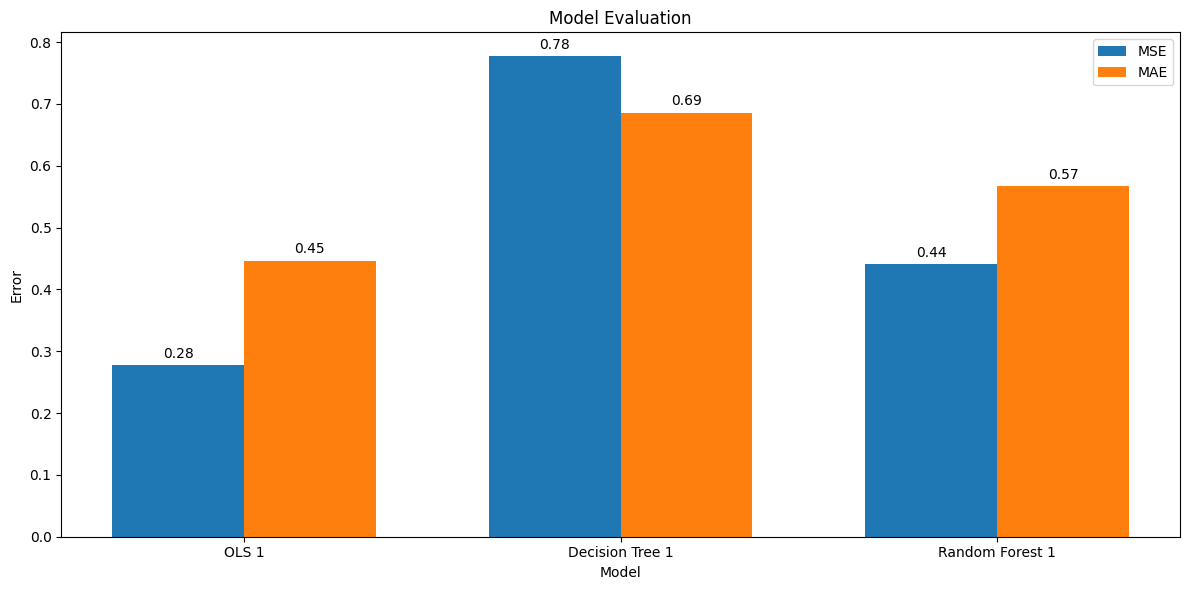

In [19]:

# Function to train and evaluate an OLS model
def train_and_evaluate_ols(data, features, random_state):
    train, test = train_test_split(data, train_size=0.8, random_state=random_state)

    # Add the log-transformed 'value' column to both train and test sets
    train['ln_value'] = np.log(train['value'])
    test['ln_value'] = np.log(test['value'])

    # Create the formula for the OLS model
    formula = 'ln_value ~ ' + ' + '.join(features)

    # Train the OLS model
    model = smf.ols(formula, data=train).fit()

    # Make predictions on the test set
    test['ln_value_pred'] = model.predict(test)

    # Compute MSE and MAE
    mse = mean_squared_error(test['ln_value'], test['ln_value_pred'])
    mae = mean_absolute_error(test['ln_value'], test['ln_value_pred'])

    return mse, mae, test

# Function to train and evaluate a Decision Tree model
def train_and_evaluate_decision_tree(data, features, random_state):
    train, test = train_test_split(data, train_size=0.8, random_state=random_state)

    # Add the log-transformed 'value' column to both train and test sets
    train['ln_value'] = np.log(train['value'])
    test['ln_value'] = np.log(test['value'])

    # Train the decision tree model
    model = DecisionTreeRegressor(random_state=random_state)
    model.fit(train[features], train['ln_value'])

    # Make predictions on the test set
    test['ln_value_pred'] = model.predict(test[features])

    # Compute MSE and MAE
    mse = mean_squared_error(test['ln_value'], test['ln_value_pred'])
    mae = mean_absolute_error(test['ln_value'], test['ln_value_pred'])

    return mse, mae, test

# Function to train and evaluate a Random Forest model
def train_and_evaluate_random_forest(data, features, random_state):
    train, test = train_test_split(data, train_size=0.8, random_state=random_state)

    # Add the log-transformed 'value' column to both train and test sets
    train['ln_value'] = np.log(train['value'])
    test['ln_value'] = np.log(test['value'])

    # Train the random forest model
    model = RandomForestRegressor(random_state=random_state)
    model.fit(train[features], train['ln_value'])

    # Make predictions on the test set
    test['ln_value_pred'] = model.predict(test[features])

    # Compute MSE and MAE
    mse = mean_squared_error(test['ln_value'], test['ln_value_pred'])
    mae = mean_absolute_error(test['ln_value'], test['ln_value_pred'])

    return mse, mae, test

# Updated feature set for goalkeepers
features_1 = [
    'age', 'CL', 'wins_gk', 'draws_gk', 'passes_pct_launched_gk',
    'psnpxg_per_shot_on_target_against', 'isPremierLeague', 'isLigue1', 'clean_sheetsm',
    'isLaLiga', 'isSerieA', 'isBundesliga'
]


# Train and evaluate models
print('Evaluating OLS Model 1:')
ols_mse1, ols_mae1, test_ols = train_and_evaluate_ols(data_GoalKeepers, features_1, random_state=42)
print(f'OLS Model 1 - MSE: {ols_mse1}, MAE: {ols_mae1}')
print('R2 Score:', r2_score(test_ols['ln_value'], test_ols['ln_value_pred']))

print('Evaluating Decision Tree Model 1:')
dt_mse1, dt_mae1, test_dt = train_and_evaluate_decision_tree(data_GoalKeepers, features_1, random_state=42)
print(f'Decision Tree Model 1 - MSE: {dt_mse1}, MAE: {dt_mae1}')
print('R2 Score:', r2_score(test_dt['ln_value'], test_dt['ln_value_pred']))

print('Evaluating Random Forest Model 1:')
rf_mse1, rf_mae1, test_rf = train_and_evaluate_random_forest(data_GoalKeepers, features_1, random_state=42)
print(f'Random Forest Model 1 - MSE: {rf_mse1}, MAE: {rf_mae1}')
print('R2 Score:', r2_score(test_rf['ln_value'], test_rf['ln_value_pred']))

# Print actual vs predicted values for some players
print('Actual vs Predicted (ln_value) for OLS Model:')
print(pd.DataFrame({'Actual': test_ols['ln_value'], 'Predicted': test_ols['ln_value_pred']}).head(10))

print('Actual vs Predicted (ln_value) for Decision Tree Model:')
print(pd.DataFrame({'Actual': test_dt['ln_value'], 'Predicted': test_dt['ln_value_pred']}).head(10))

print('Actual vs Predicted (ln_value) for Random Forest Model:')
print(pd.DataFrame({'Actual': test_rf['ln_value'], 'Predicted': test_rf['ln_value_pred']}).head(10))

# Plotting the results
labels = ['OLS 1', 'Decision Tree 1', 'Random Forest 1']
mse_values = [ols_mse1, dt_mse1, rf_mse1]
mae_values = [ols_mae1, dt_mae1, rf_mae1]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - width/2, mse_values, width, label='MSE')
rects2 = ax.bar(x + width/2, mae_values, width, label='MAE')

ax.set_xlabel('Model')
ax.set_ylabel('Error')
ax.set_title('Model Evaluation')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()


Evaluating OLS Model 1:
OLS Model 1 - MSE: 0.27755828817360645, MAE: 0.43570543229021264
R2 Score: 0.7067362154059624
Evaluating Decision Tree Model 1:
Decision Tree Model 1 - MSE: 0.8019325471416606, MAE: 0.6923668326200481
R2 Score: 0.15269050219533908
Evaluating Random Forest Model 1:
Random Forest Model 1 - MSE: 0.4430704916683867, MAE: 0.5698278885689573
R2 Score: 0.5318585869525909
Actual vs Predicted (ln_value) for OLS Model:
         Actual  Predicted
2120  14.508658  15.002547
2475  15.201805  15.382632
18    16.454568  15.506903
4911  14.914123  15.014962
3182  14.914123  15.362264
1271  15.894952  15.932319
2674  14.375126  14.991026
4653  14.914123  15.459094
3144  15.424948  15.762230
3003  14.914123  15.385396
Actual vs Predicted (ln_value) for Decision Tree Model:
         Actual  Predicted
2120  14.508658  15.607270
2475  15.201805  15.607270
18    16.454568  15.424948
4911  14.914123  15.894952
3182  14.914123  14.914123
1271  15.894952  16.012735
2674  14.375126  16.3

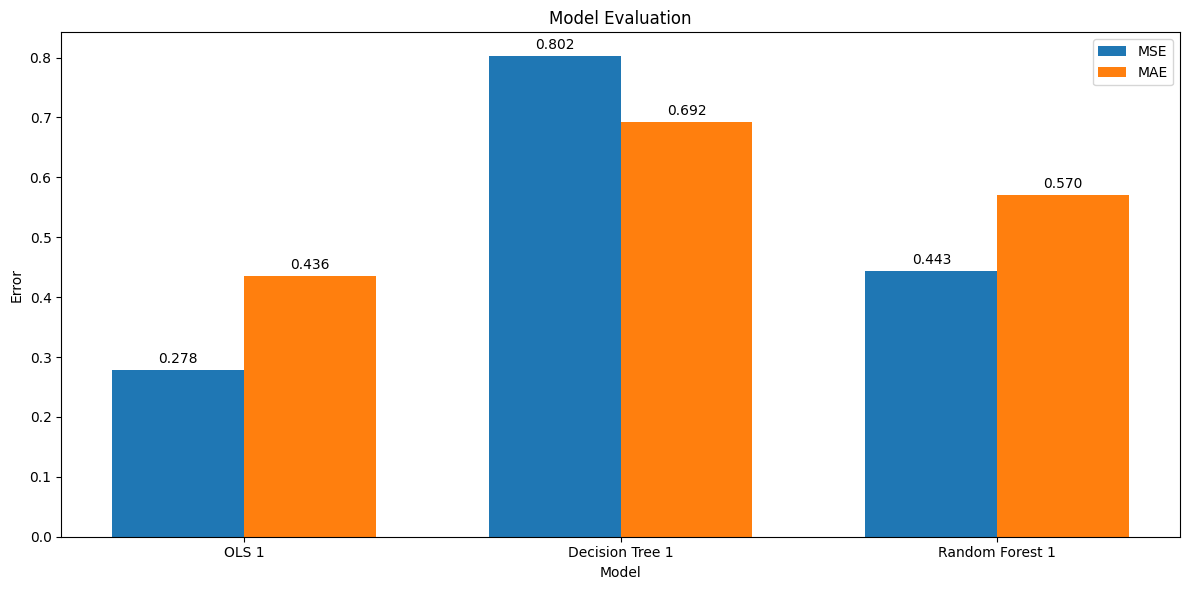

In [20]:
# Function to train and evaluate an OLS model
def train_and_evaluate_ols(data, features, random_state):
    train, test = train_test_split(data, train_size=0.8, random_state=random_state)

    # Add the log-transformed 'value' column to both train and test sets
    train['ln_value'] = np.log(train['value'])
    test['ln_value'] = np.log(test['value'])

    # Create the formula for the OLS model
    formula = 'ln_value ~ ' + ' + '.join(features)

    # Train the OLS model
    model = smf.ols(formula, data=train).fit()

    # Make predictions on the test set
    test['ln_value_pred'] = model.predict(test)

    # Compute MSE and MAE
    mse = mean_squared_error(test['ln_value'], test['ln_value_pred'])
    mae = mean_absolute_error(test['ln_value'], test['ln_value_pred'])

    return mse, mae, test

# Function to train and evaluate a Decision Tree model
def train_and_evaluate_decision_tree(data, features, random_state):
    train, test = train_test_split(data, train_size=0.8, random_state=random_state)

    # Add the log-transformed 'value' column to both train and test sets
    train['ln_value'] = np.log(train['value'])
    test['ln_value'] = np.log(test['value'])

    # Train the decision tree model
    model = DecisionTreeRegressor(random_state=random_state)
    model.fit(train[features], train['ln_value'])

    # Make predictions on the test set
    test['ln_value_pred'] = model.predict(test[features])

    # Compute MSE and MAE
    mse = mean_squared_error(test['ln_value'], test['ln_value_pred'])
    mae = mean_absolute_error(test['ln_value'], test['ln_value_pred'])

    return mse, mae, test

# Function to train and evaluate a Random Forest model
def train_and_evaluate_random_forest(data, features, random_state):
    train, test = train_test_split(data, train_size=0.8, random_state=random_state)

    # Add the log-transformed 'value' column to both train and test sets
    train['ln_value'] = np.log(train['value'])
    test['ln_value'] = np.log(test['value'])

    # Train the random forest model
    model = RandomForestRegressor(random_state=random_state)
    model.fit(train[features], train['ln_value'])

    # Make predictions on the test set
    test['ln_value_pred'] = model.predict(test[features])

    # Compute MSE and MAE
    mse = mean_squared_error(test['ln_value'], test['ln_value_pred'])
    mae = mean_absolute_error(test['ln_value'], test['ln_value_pred'])

    return mse, mae, test

# Feature sets for goalkeepers
features_1 = [
    'age', 'CL', 'wins_gk', 'draws_gk', 'passes_pct_launched_gk',
    'psnpxg_per_shot_on_target_against', 'isPremierLeague', 'isLigue1', 'clean_sheetsm'
]


# Train and evaluate models
print('Evaluating OLS Model 1:')
ols_mse1, ols_mae1, test_ols = train_and_evaluate_ols(data_GoalKeepers, features_1, random_state=42)
print(f'OLS Model 1 - MSE: {ols_mse1}, MAE: {ols_mae1}')
print('R2 Score:', r2_score(test_ols['ln_value'], test_ols['ln_value_pred']))

print('Evaluating Decision Tree Model 1:')
dt_mse1, dt_mae1, test_dt = train_and_evaluate_decision_tree(data_GoalKeepers, features_1, random_state=42)
print(f'Decision Tree Model 1 - MSE: {dt_mse1}, MAE: {dt_mae1}')
print('R2 Score:', r2_score(test_dt['ln_value'], test_dt['ln_value_pred']))

print('Evaluating Random Forest Model 1:')
rf_mse1, rf_mae1, test_rf = train_and_evaluate_random_forest(data_GoalKeepers, features_1, random_state=42)
print(f'Random Forest Model 1 - MSE: {rf_mse1}, MAE: {rf_mae1}')
print('R2 Score:', r2_score(test_rf['ln_value'], test_rf['ln_value_pred']))

# Print actual vs predicted values for some players
print('Actual vs Predicted (ln_value) for OLS Model:')
print(pd.DataFrame({'Actual': test_ols['ln_value'], 'Predicted': test_ols['ln_value_pred']}).head(10))

print('Actual vs Predicted (ln_value) for Decision Tree Model:')
print(pd.DataFrame({'Actual': test_dt['ln_value'], 'Predicted': test_dt['ln_value_pred']}).head(10))

print('Actual vs Predicted (ln_value) for Random Forest Model:')
print(pd.DataFrame({'Actual': test_rf['ln_value'], 'Predicted': test_rf['ln_value_pred']}).head(10))

# Plotting the results
labels = ['OLS 1', 'Decision Tree 1', 'Random Forest 1']
mse_values = [ols_mse1, dt_mse1, rf_mse1]
mae_values = [ols_mae1, dt_mae1, rf_mae1]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - width/2, mse_values, width, label='MSE')
rects2 = ax.bar(x + width/2, mae_values, width, label='MAE')

ax.set_xlabel('Model')
ax.set_ylabel('Error')
ax.set_title('Model Evaluation')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()
